In [57]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit import RDLogger
import pandas as pd
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem.ReducedGraphs import TanimotoSimilarity

lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

In [18]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [mol for mol in suppl if mol]
mtor = pd.read_csv(
    '../data/chembl_mtor_ic50.csv',
    # on_bad_lines='skip',
    sep=';'
    )

In [19]:
fpgen = AllChem.GetMorganGenerator(radius=2)

In [20]:
m1 = Chem.MolFromSmiles('Cc1ccccc1')
f1 = fpgen.GetSparseCountFingerprint(m1)
f1.GetNonzeroElements()

{98513984: 3,
 422715066: 1,
 908339072: 1,
 951226070: 2,
 2246728737: 1,
 2763854213: 1,
 3207567135: 1,
 3217380708: 1,
 3218693969: 5,
 3999906991: 2,
 4244175903: 2}

In [25]:
f2 = fpgen.GetFingerprint(m1)
list(f2.GetOnBits())

[389, 1055, 1057, 1088, 1199, 1380, 1722, 1750, 1823, 1873, 1920]

In [26]:
len(f2.GetOnBits()) == len(f1.GetNonzeroElements())

True

In [29]:
DataStructs.TanimotoSimilarity(f1, f1)

1.0

In [40]:
# find all mtor mols similar to drugbank mols
db_fps = [fpgen.GetFingerprint(mol) for mol in drugbank]
mtor_fps = [fpgen.GetFingerprint(Chem.MolFromSmiles(smi)) for smi in mtor["Smiles"] if smi is not None]

similarities = {}
for i, qfp in enumerate(mtor_fps):
    for j, dfp in enumerate(db_fps):
        similarities[(i, j)] = DataStructs.TanimotoSimilarity(qfp, dfp)

In [47]:
high_sim = {k: v for k, v in similarities.items() if v > 0.8}
high_sim

{(17, 1099): 1.0,
 (23, 760): 0.8421052631578947,
 (23, 1377): 0.8461538461538461,
 (23, 4580): 1.0,
 (36, 5903): 1.0,
 (77, 760): 0.8421052631578947,
 (145, 287): 1.0,
 (145, 6682): 0.8305084745762712,
 (205, 5905): 1.0,
 (211, 5904): 0.9574468085106383,
 (218, 5214): 1.0,
 (317, 760): 1.0,
 (317, 1377): 0.8727272727272727,
 (317, 4580): 0.8421052631578947,
 (338, 1700): 1.0,
 (373, 747): 1.0,
 (379, 760): 1.0,
 (379, 1377): 0.8727272727272727,
 (379, 4580): 0.8421052631578947,
 (496, 1130): 1.0,
 (517, 4580): 0.905982905982906,
 (540, 5910): 1.0,
 (551, 747): 1.0,
 (566, 5468): 1.0,
 (888, 5904): 0.8301886792452831,
 (889, 5904): 0.8148148148148148,
 (906, 6143): 1.0,
 (954, 6143): 1.0,
 (1002, 287): 1.0,
 (1002, 6682): 0.8305084745762712,
 (1045, 2344): 1.0,
 (1057, 760): 0.8347826086956521,
 (1060, 2344): 1.0,
 (1067, 760): 1.0,
 (1067, 1377): 0.8727272727272727,
 (1067, 4580): 0.8421052631578947,
 (1095, 1141): 1.0,
 (1095, 5860): 0.8095238095238095,
 (1134, 5121): 0.8301886792452

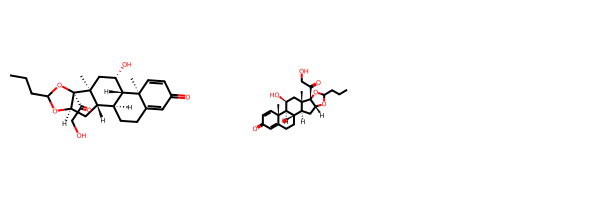

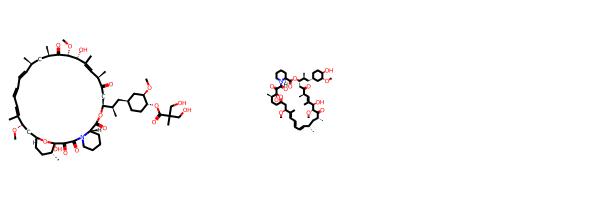

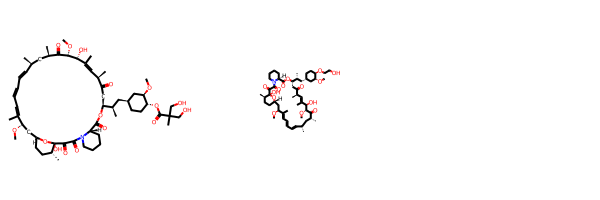

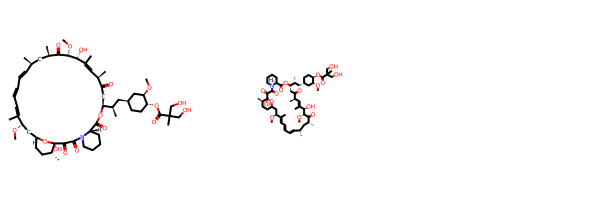

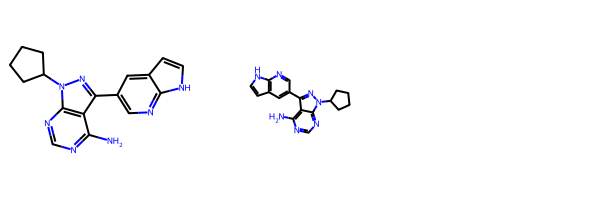

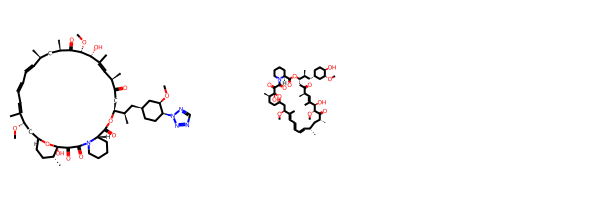

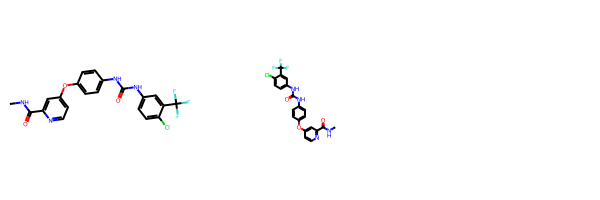

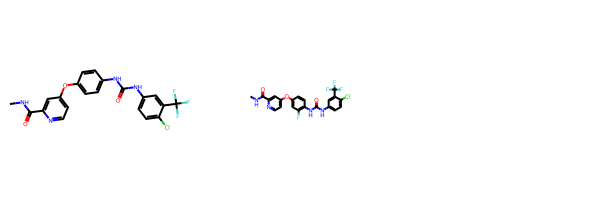

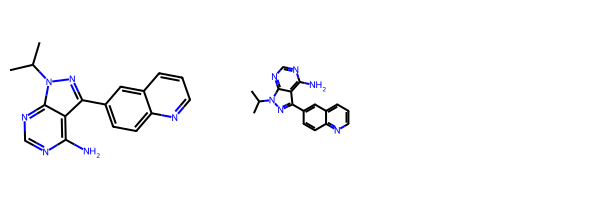

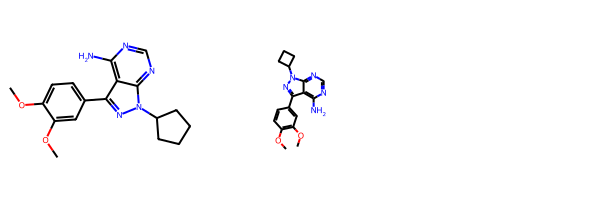

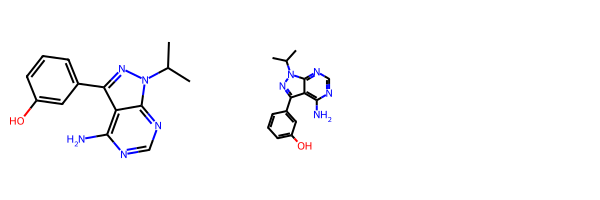

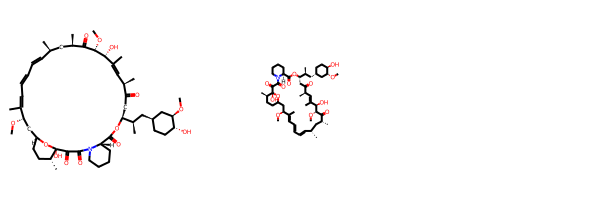

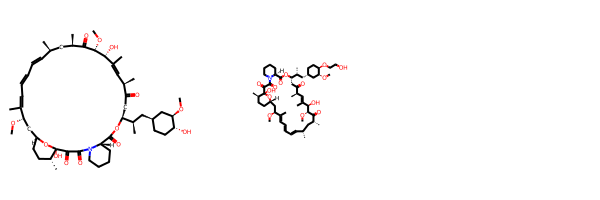

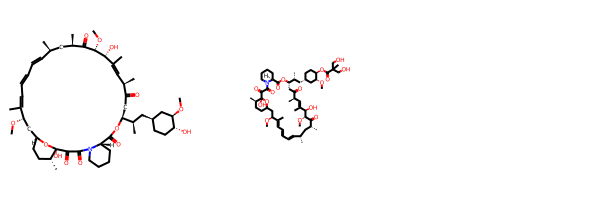

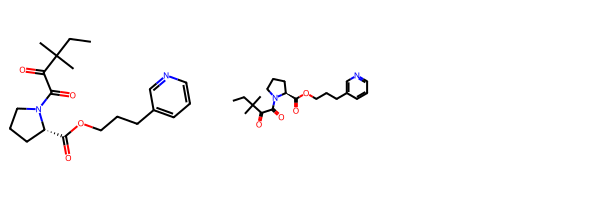

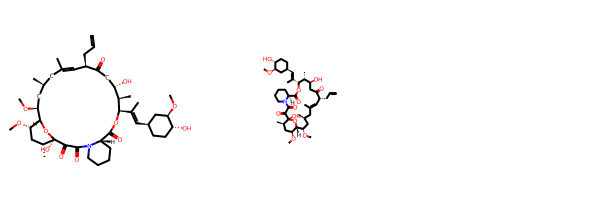

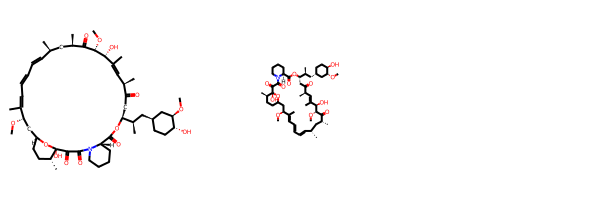

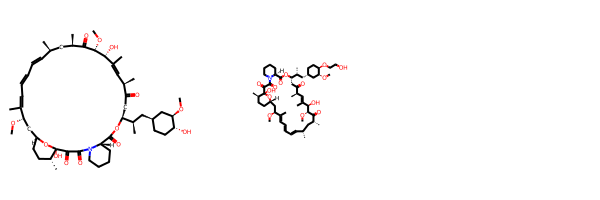

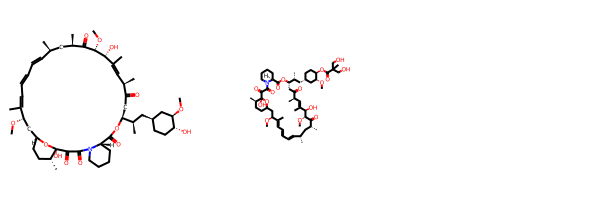

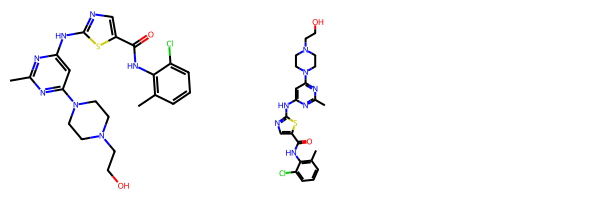

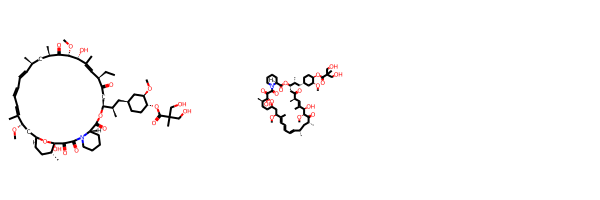

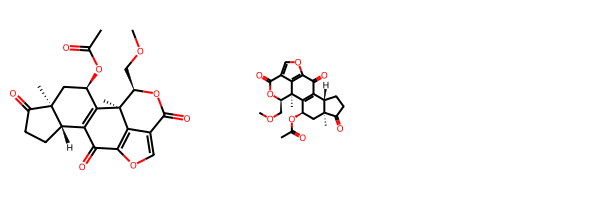

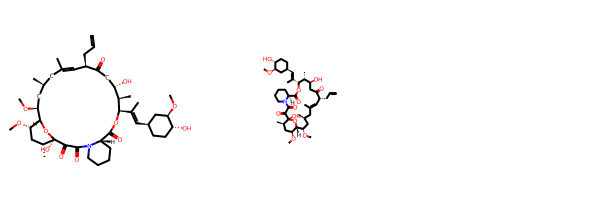

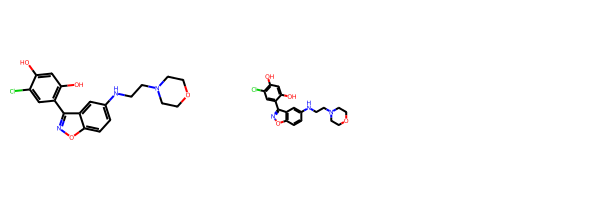

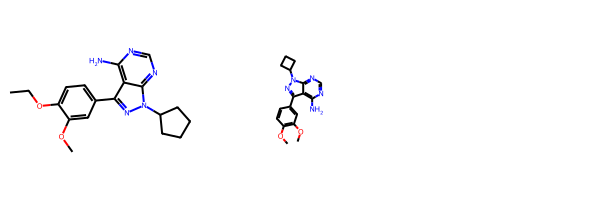

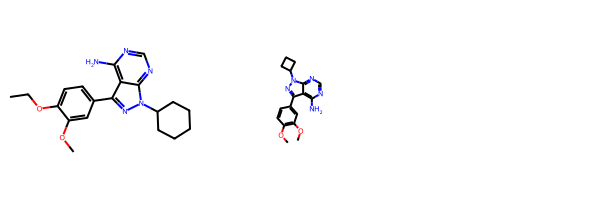

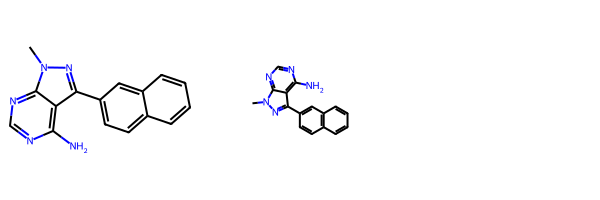

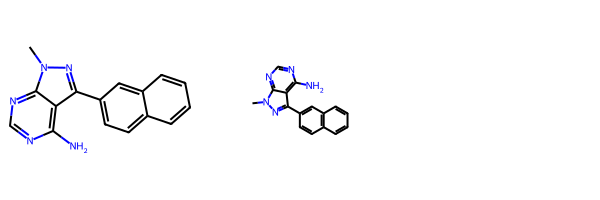

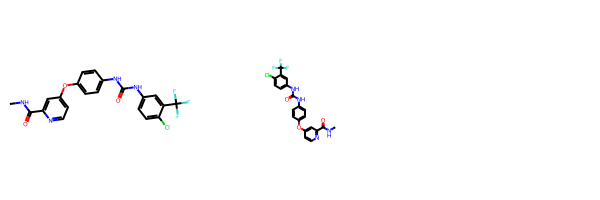

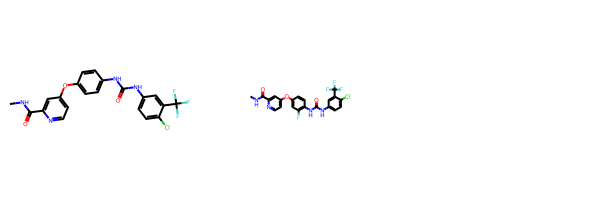

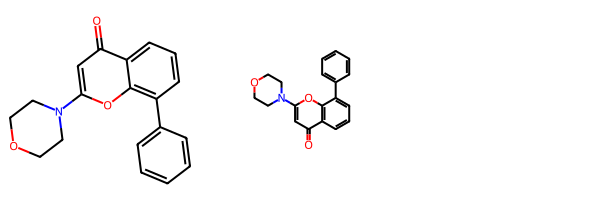

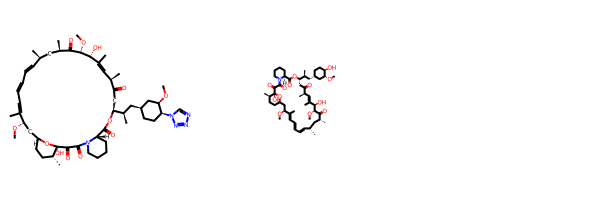

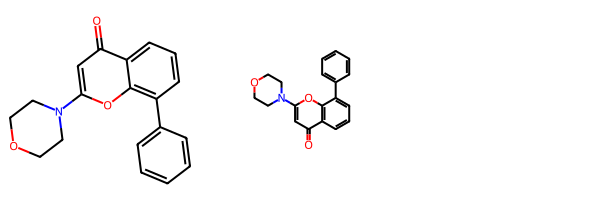

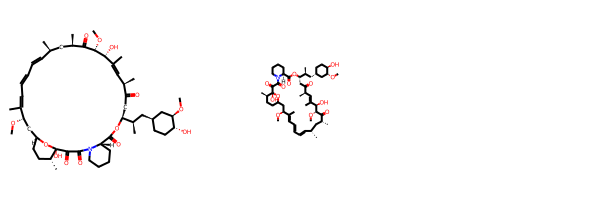

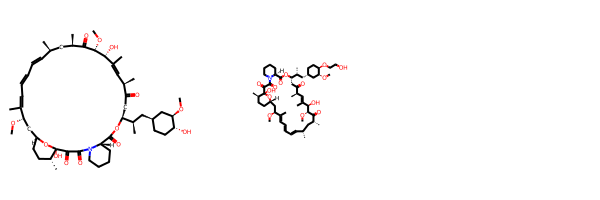

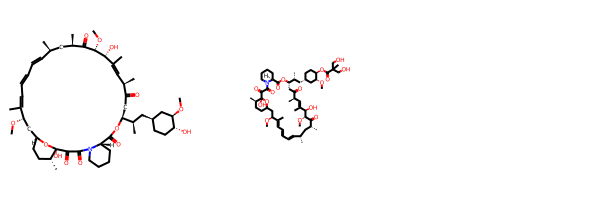

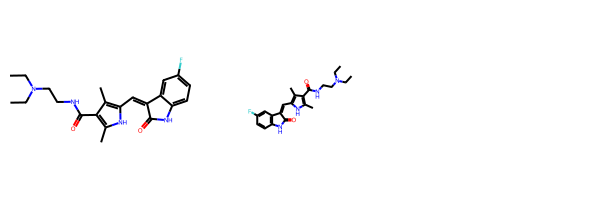

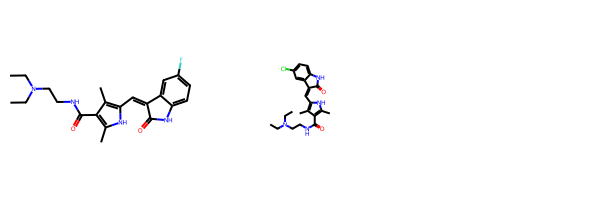

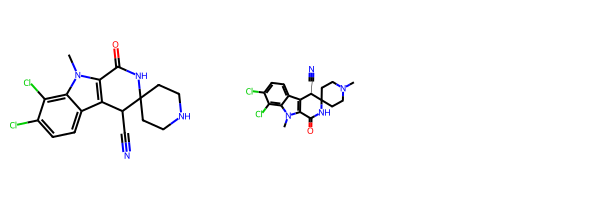

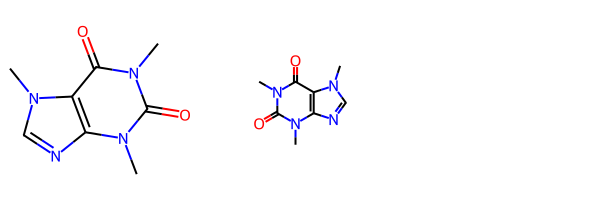

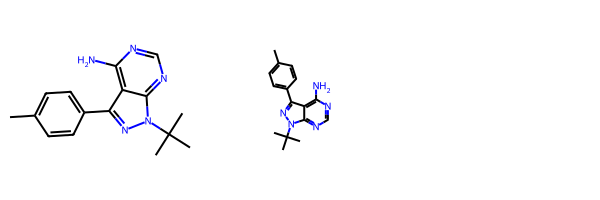

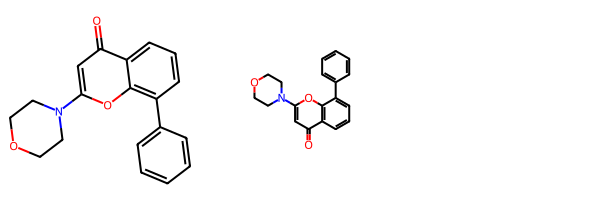

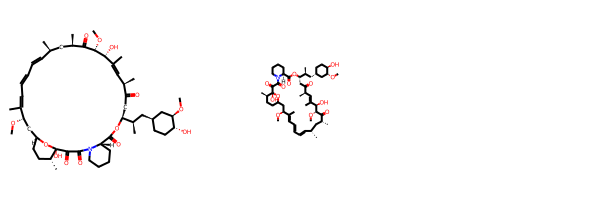

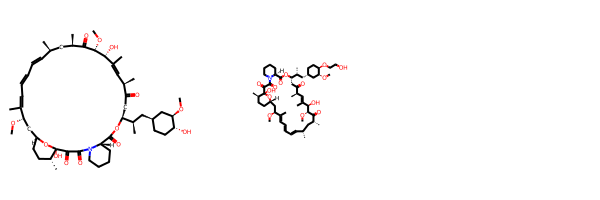

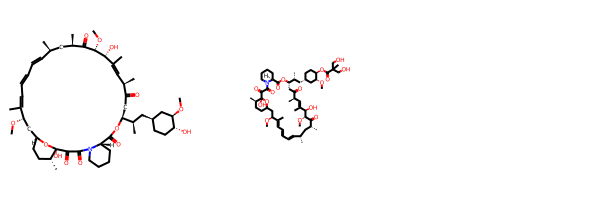

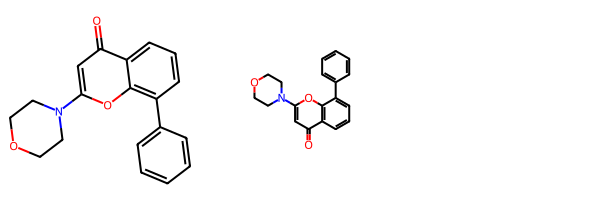

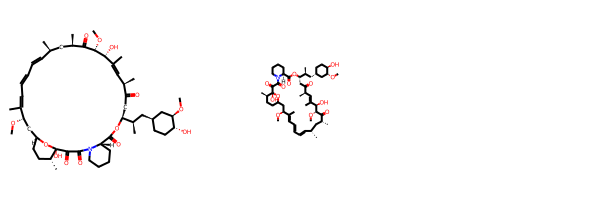

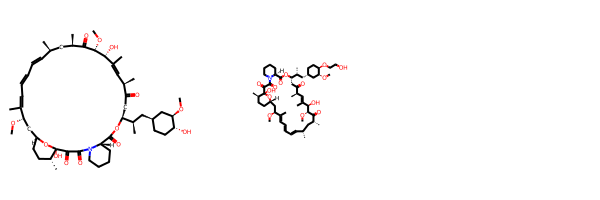

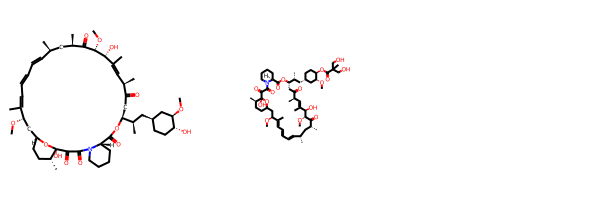

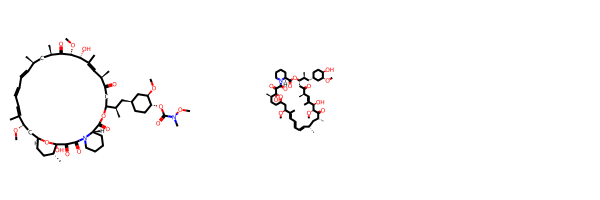

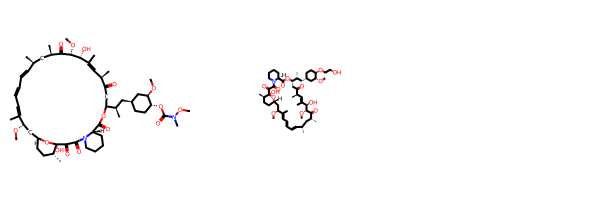

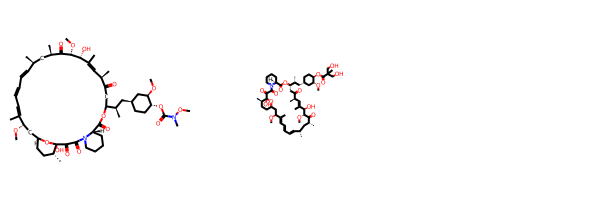

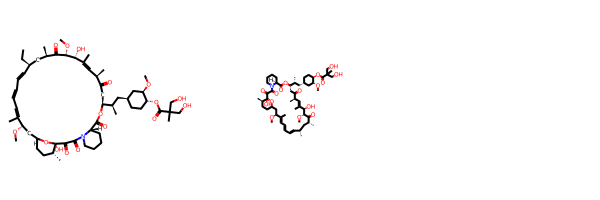

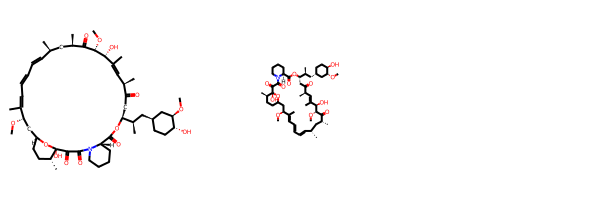

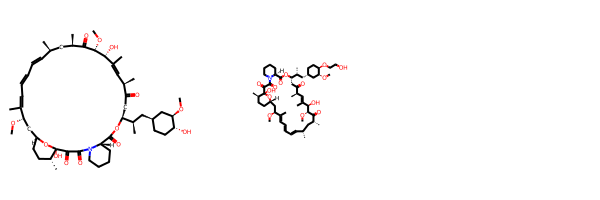

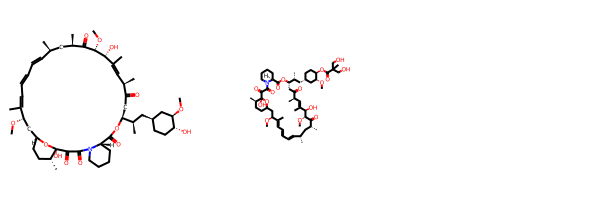

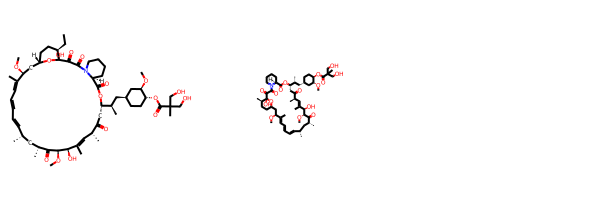

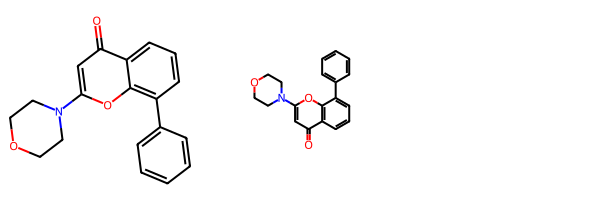

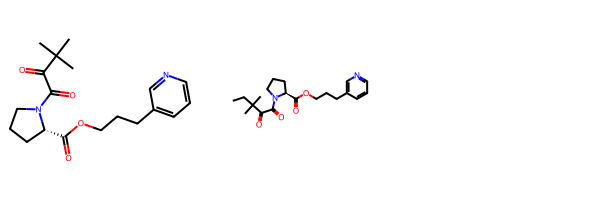

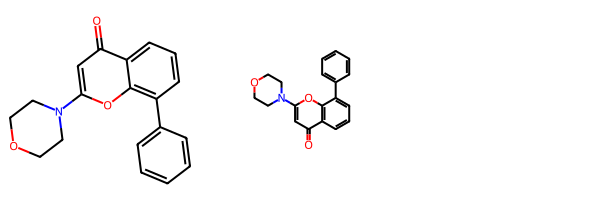

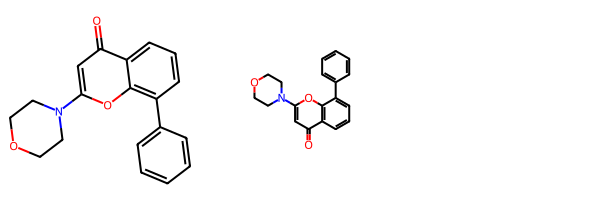

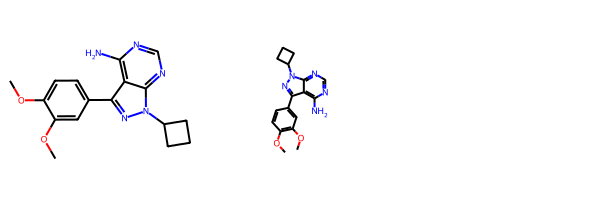

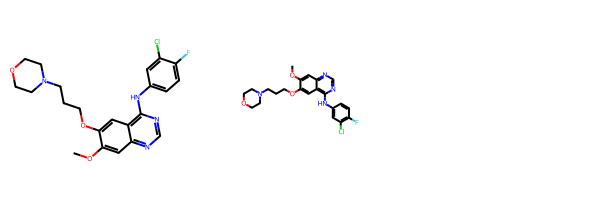

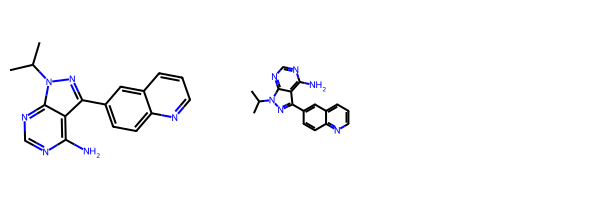

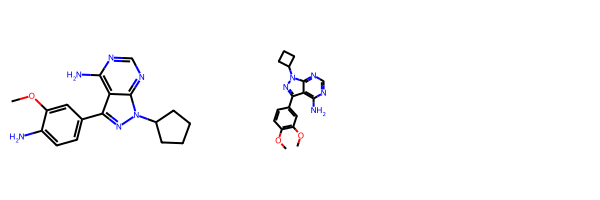

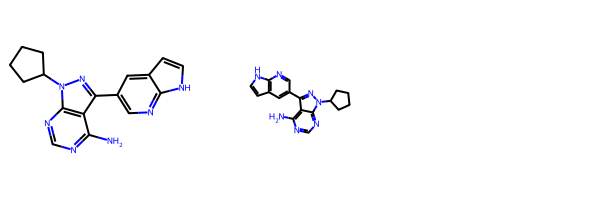

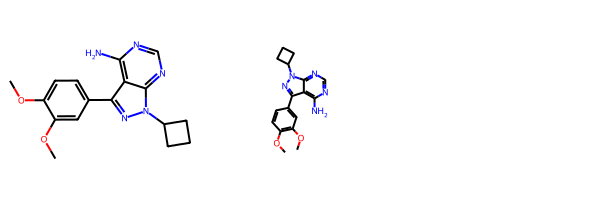

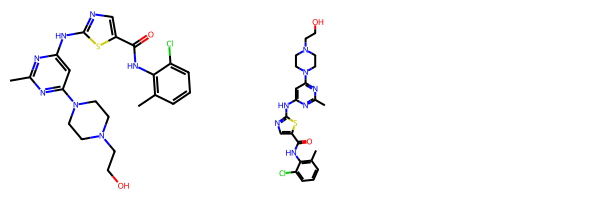

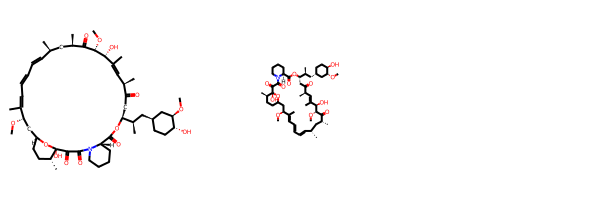

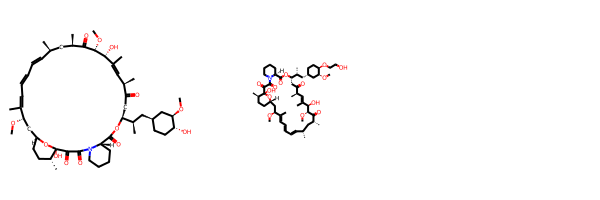

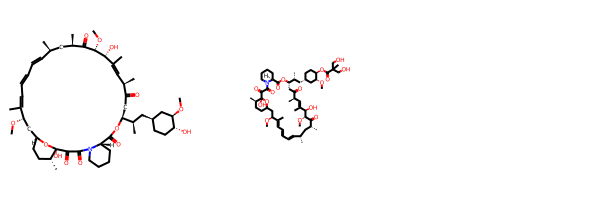

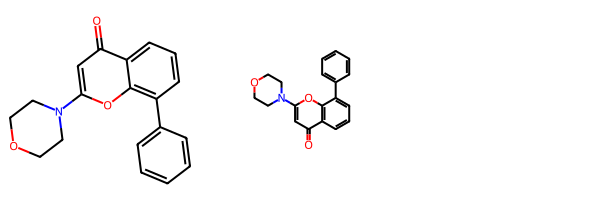

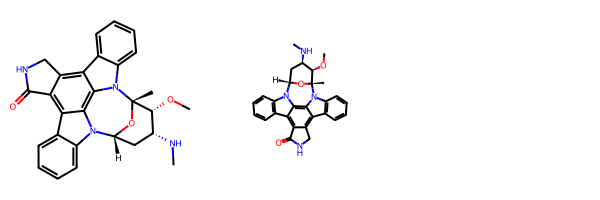

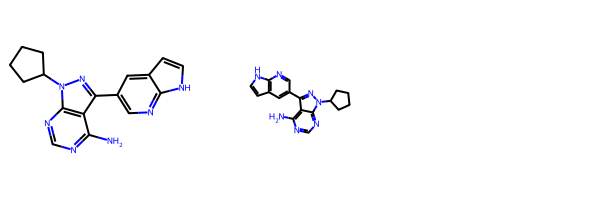

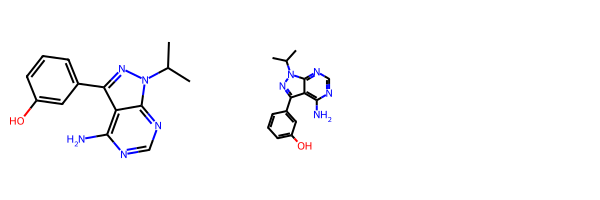

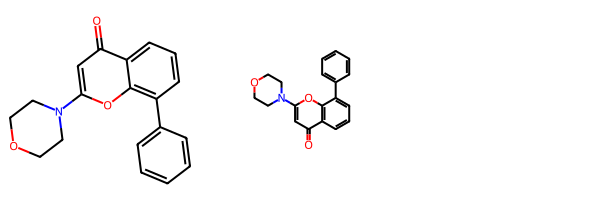

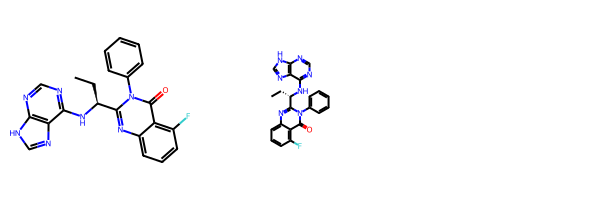

In [64]:
for idxs in high_sim.keys():
    idxs = list(idxs)
    id_m = idxs[0]
    id_d = idxs[1]
    mol_m = Chem.MolFromSmiles(mtor["Smiles"][id_m])
    mol_d = drugbank[id_d]

    display(Draw.MolsToGridImage([mol_m, mol_d]))

In [ ]:
ao = Chem.AdditionalOutput()
ao.CollectBitInfoMap()
fp = fpgen.GetFingerprint()